# Shiv Pratap Singh 200968038 Week 3

## EX1

### 1.Use the titanic data set, perform preprocessing by deal with missing values, drop irrelevant attributes

In [2]:
import pandas as pd
df = pd.read_csv('train (1).csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
pd.options.mode.chained_assignment = None 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


We see inconsistencies in the non-null column while the rest columns show 891 non-null rows, agew shows 714 and cabin has only 204 non-null. 

In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Among all the columns,  without even performing attribute relevance analysis we can safely discard Name, PassengerId, Cabin, Ticket attributes since they're clearly irrelevant to our predictive model.

In [7]:
col = ['Name', 'PassengerId', 'Cabin', 'Ticket']
df = df.drop(col,axis=1)

In [8]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


Now to deal with missing values let's start with age. Instead of using some hard coded value-mean or median we'll use interpolate() function to interpolate age using nearby values in the dataframe. This treats values as equally spaced and ignores index. We'll be using a simple method for interpolation - default one. Many others exist but that level of complexity is unnecessary for this data.

In [9]:
df.Age = df.Age.interpolate()

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [11]:
df = df.dropna()

In [12]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    object 
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 62.5+ KB


In [13]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,22.5,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


Missing values have been dealt with

### 2.Use the scikit learn pipelines  to perform the preprocessing -standardizing, encoding and  model fitting in one step. 

In [14]:
X = df.drop('Survived', axis=1)
y = df['Survived'].values

In [15]:
from sklearn.impute import SimpleImputer,KNNImputer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import FeatureUnion, Pipeline
import numpy as np
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.compose import ColumnTransformer

In [16]:
from sklearn.naive_bayes import GaussianNB

In [17]:
cat_cols = ['Embarked', 'Sex', 'Pclass']
cat_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore', sparse=False)),])
num_cols = ['Age', 'Fare']
num_transformer = Pipeline(steps=[('scaler', StandardScaler())])
preprocessor = ColumnTransformer(
    transformers=[('num', num_transformer, num_cols),('cat', cat_transformer, cat_cols)
    ])

In [18]:
clf = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', GaussianNB())])
# Pipeline built - PreprocessingNaive Bayes Model

###  3. Perform Bayes classification using cross validation.

In [19]:
cross_val_score(clf, X, y, cv=5, scoring="accuracy").mean()
#Perform Naive Bayes and outputting the mean cross validation score with 5-fold

0.773922427474132

### 4.Tabulate using relevant measures of accuracy , precision, recall.

In [20]:
clf.fit(X,y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Fare']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['Embarked', 'Sex',
                                                   'Pclass'])])),
                ('classifier', GaussianNB())])

In [21]:
y_pred = clf.predict(X)

In [22]:
from sklearn.metrics import classification_report
from sklearn.metrics import  confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

In [23]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.80      0.82       549
           1       0.70      0.75      0.72       340

    accuracy                           0.78       889
   macro avg       0.77      0.77      0.77       889
weighted avg       0.78      0.78      0.78       889



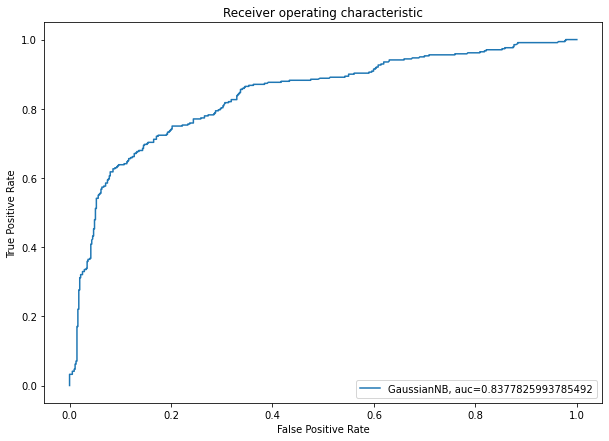

In [24]:
y_pred_proba = clf.predict_proba(X)[::,1]
fpr, tpr, _ = roc_curve(y, y_pred_proba)

auc = roc_auc_score(y, y_pred_proba)
plt.figure(figsize = (10,7))
plt.plot(fpr,tpr,label="GaussianNB, auc="+str(auc))
plt.legend(loc=4)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

An excellent model has AUC near to the 1 which means it has a good measure of separability. Here AOC = 0.8377 which is good enough considering no hyperparameter has been tuned

In [25]:
import seaborn as sns

<AxesSubplot:>

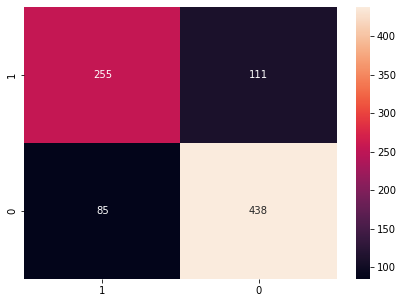

In [26]:
cm = confusion_matrix(y_pred, y, labels=[1,0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],columns = [i for i in ["1", "0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, fmt='g')

## EX2

### Download the "Womens Clothing E-Commerce Reviews.zip" file and answer the following:
### 1. Preprocessing Pipeline:
     a.Find any null values are present or not, If present remove those data.
     b.Remove the data that have less than 5 reviews.
     c.Clean the data and remove the special characters and replace the contractions with its expansion. 
     Convert the uppercase character to lower case.Also, remove the punctuations.

In [29]:
df_w = pd.read_csv('Womens Clothing E-Commerce Reviews.csv')
df_w

,Clothing ID,Age,Title,Review Text,Rating,Positive Feedback Count,Division Name,Department Name,Category,Recommended IND
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,0,Initmates,Intimate,Intimates,1
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,4,General,Dresses,Dresses,1
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,General,Dresses,Dresses,0
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,0,General Petite,Bottoms,Pants,1
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,6,General,Tops,Blouses,1
...,...,...,...,...,...,...,...,...,...,...
23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,0,General Petite,Dresses,Dresses,1
23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,0,General Petite,Tops,Knits,1
23483,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,1,General Petite,Dresses,Dresses,0
23484,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,2,General,Dresses,Dresses,1


In [30]:
def missing_val(women_rev):
    if women_rev.isnull().values.any():
        return women_rev.dropna()

In [31]:
def remove_5_rev(women_rev):
    m =dict(women_rev.groupby('Clothing ID').size())
    for i in m:
        if m[i]<5:
            women_rev.drop(women_rev[women_rev['Clothing ID'] == i].index, inplace = True)
    return women_rev
    

In [32]:
contractions = {
"a'ight":"alright",
"ain't":"are not",
"amn't":"am not",
"aren't":"are not",
"can't":"cannot",
"'cause": "because",
"could've":"could have",
"couldn't":"could not",
"couldn't've":"could not have",
"daren't":"dare not",
"daresn't":"dare not",
"dasn't":"dare not",
"didn't":"did not",
"doesn't":"does not",
"don't":"do not",
"everybody's":"everybody is",
"everyone's":"everyone is",
"giv'n":"given",
"gonna":"going to",
"gon't":"go not", 
"gotta":"got to",
"hadn't":"had not",
"had've":"had have",
"hasn't":"has not",
"haven't":"have not",
"he'd":"he had", 
"he'll":"he will",
"he's":"he is",
"here's":"here is",
"how'd":"how did",
"how'll":"how will",
"how're":"how are",
"how's":"how is",
"I'd":"I had",
"I'd've":"I would have",
"I'd'nt":"I would not",
"I'd'nt've":"I would not have",
"I'll":"I will",
"I'm":"I am",
"I've":"I have",
"isn't":"is not",
"it'd":"it would",
"it'll":"it will",
"it's":"it is",
"let's":"let us",
"ma'am":"madam",
"mayn't":"may not",
"may've":"may have",
"mightn't":"might not",
"might've":"might have",
"mustn't":"must not",
"mustn't've":"must not have",
"must've":"must have",
"needn't":"need not",
"needn't've":"need not have",
"o'clock":"of the clock",
"oughtn't":"ought not",
"oughtn't've":"ought not have",
"shan't":"shall not",
"she'd":"she would",
"she'll":"she will",
"she's":"she is",
"should've":"should have",
"shouldn't":"should not",
"shouldn't've":"should not have",
"somebody's":"somebody is",
"someone's":"someone is",
"something's":"something is",
"so're":"so are",
"so’s":"so is",
"so’ve":"so have",
"that'll":"that will",
"that're":"that are",
"that's":"that is",
"that'd":"that would",
"there'd":"there would",
"there'll":"there will",
"there're":"there are",
"there's":"there is",
"these're":"these are",
"these've":"these have",
"they'd":"they would",
"they'll":"they will",
"they're":"they are",
"they've":"they have",
"this's":"this is",
"those're":"those are",
"those've":"those have",
"to've":"to have",
"wasn't":"was not",
"we'd":"we would",
"we'd've":"we would have",
"we'll":"we will",
"we're":"we are",
"we've":"we have",
"weren't":"were not",
"what'd":"what did",
"what'll":"what will",
"what're":"what are",
"what's":"what is",
"what've":"what have",
"when's":"when is",
"where'd":"where did",
"where'll":"where will",
"where're":"where are",
"where's":"where is",
"where've":"where have",
"which'd":"which would",
"which'll":"which will",
"which're":"which are",
"which's":"which is",
"which've":"which have",
"who'd":"who would",
"who'd've":"who would have",
"who'll":"who will",
"who're":"who are",
"who's":"who is",
"who've":"who have",
"why'd":"why did",
"why're":"why are",
"why's":"why is",
"won't":"will not",
"would've":"would have",
"wouldn't":"would not",
"wouldn't've":"would not have",
"y'at":"you at",
"yes’m":"yes madam",
"you'd":"you would",
"you'll":"you will",
"you're":"you are",
"you've":"you have"}

Removing contractions, punctuations,special character, lowering from uppercase, removing numbers and etc

In [33]:
import re
def preprocess(x):
        x = str(x).lower()
        x = x.replace(",000,000", "m").replace(",000", "k").replace("′", "'").replace("’", "'")\
                          .replace("won't", "will not").replace("cannot", "can not").replace("can't", "can not")\
                          .replace("n't", " not").replace("what's", "what is").replace("it's", "it is")\
                          .replace("'ve", " have").replace("i'm", "i am").replace("'re", " are")\
                          .replace("he's", "he is").replace("she's", "she is").replace("'s", " own")\
                          .replace("%", " percent ").replace("₹", " rupee ").replace("$", " dollar ")\
                          .replace("€", " euro ").replace("'ll", " will")
        x = re.sub(r"([0-9]+)000000", r"\1m", x)
        x = re.sub(r"([0-9]+)000", r"\1k", x)
        x = re.sub(r"[^a-zA-Z0-9:$-,%.?!]+", ' ', x) 
        pattern = re.compile('\W')
        if type(x) is str:
            x = x.replace('\\','')
            for key in contractions:
                value = contractions[key]
                x = x.replace(key, value)
        if type(x) == type(''):
            x = re.sub(pattern, ' ', x)
        return x

In [34]:
df_w_drop = missing_val(df_w)
df_w_preprocessed = remove_5_rev(df_w_drop)
df_w_preprocessed['Review Text'] = df_w_preprocessed['Review Text'].apply(preprocess)

### 2. Separate the columns into dependent and independent variables (or features and labels). Then you split those variables into train and test sets (80:20).

In [35]:
from textblob import TextBlob

Use the textblob module to get the sentiment polarity metric for Review Text and Title

In [36]:
df_w_preprocessed['review_polarity'] = df_w_preprocessed['Review Text'].apply(lambda x: TextBlob(x).sentiment.polarity)
df_w_preprocessed['title_polarity'] = df_w_preprocessed['Title'].apply(lambda x: TextBlob(x).sentiment.polarity)
df_w_preprocessed['review_len'] = df_w_preprocessed['Review Text'].apply(lambda x:len(x))
df_w_preprocessed['word_count'] = df_w_preprocessed['Review Text'].apply(lambda x: len(x.split()))

In [37]:
df_w_preprocessed

,Clothing ID,Age,Title,Review Text,Rating,Positive Feedback Count,Division Name,Department Name,Category,Recommended IND,review_polarity,title_polarity,review_len,word_count
2,1077,60,Some major design flaws,i had such high hopes for this dress and reall...,3,0,General,Dresses,Dresses,0,0.076392,0.0625,498,97
3,1049,50,My favorite buy!,i love love love this jumpsuit it is fun f...,5,0,General Petite,Bottoms,Pants,1,0.500000,0.6250,125,23
5,1080,49,Not for the very petite,i love tracy reese dresses but this one is no...,2,4,General,Dresses,Dresses,0,0.178750,0.2000,488,98
6,858,39,Cagrcoal shimmer fun,i aded this in my basket at hte last mintue to...,5,1,General Petite,Tops,Knits,1,0.060500,0.3000,495,99
7,858,39,"Shimmer, surprisingly goes with lots",i ordered this in carbon for store pick up an...,4,4,General Petite,Tops,Knits,1,0.171635,0.7000,483,98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23481,1104,34,Great dress for many occasions,i was very happy to snag this dress at such a ...,5,0,General Petite,Dresses,Dresses,1,0.512667,0.6500,132,29
23482,862,48,Wish it was made of cotton,it reminds me of maternity clothes soft stre...,3,0,General Petite,Tops,Knits,1,0.091667,0.0000,223,38
23483,1104,31,"Cute, but see through",this fit well but the top was very see throug...,3,1,General Petite,Dresses,Dresses,0,0.414286,0.5000,210,44
23484,1084,28,"Very cute dress, perfect for summer parties an...",i bought this dress for a wedding i have this ...,3,2,General,Dresses,Dresses,1,0.150000,0.8250,427,87


Making some visualizations just to see counts of categorical varibles

<AxesSubplot:>

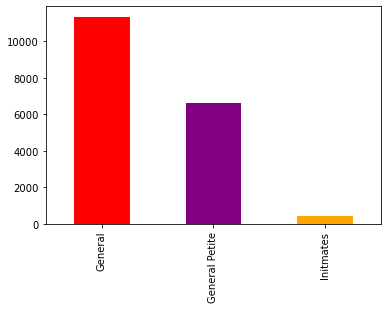

In [38]:
df_w_preprocessed["Division Name"].value_counts().plot(kind='bar',color=['Red','Purple','Orange'])

<AxesSubplot:>

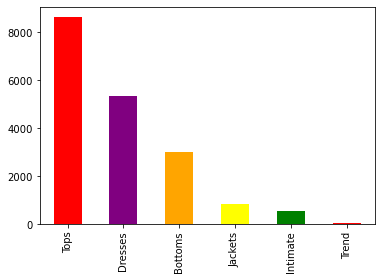

In [39]:
df_w_preprocessed["Department Name"].value_counts().plot(kind='bar',color=['Red','Purple','Orange','Yellow','Green'])

<AxesSubplot:>

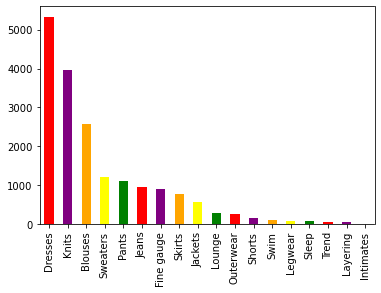

In [40]:
df_w_preprocessed["Category"].value_counts().plot(kind='bar',color=['Red','Purple','Orange','Yellow','Green'])

In [41]:
df_final = pd.get_dummies(df_w_preprocessed, columns = ['Division Name','Department Name','Category'],drop_first=True)

In [42]:
df_final

,Clothing ID,Age,Title,Review Text,Rating,Positive Feedback Count,Recommended IND,review_polarity,title_polarity,review_len,...,Category_Legwear,Category_Lounge,Category_Outerwear,Category_Pants,Category_Shorts,Category_Skirts,Category_Sleep,Category_Sweaters,Category_Swim,Category_Trend
2,1077,60,Some major design flaws,i had such high hopes for this dress and reall...,3,0,0,0.076392,0.0625,498,...,0,0,0,0,0,0,0,0,0,0
3,1049,50,My favorite buy!,i love love love this jumpsuit it is fun f...,5,0,1,0.500000,0.6250,125,...,0,0,0,1,0,0,0,0,0,0
5,1080,49,Not for the very petite,i love tracy reese dresses but this one is no...,2,4,0,0.178750,0.2000,488,...,0,0,0,0,0,0,0,0,0,0
6,858,39,Cagrcoal shimmer fun,i aded this in my basket at hte last mintue to...,5,1,1,0.060500,0.3000,495,...,0,0,0,0,0,0,0,0,0,0
7,858,39,"Shimmer, surprisingly goes with lots",i ordered this in carbon for store pick up an...,4,4,1,0.171635,0.7000,483,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23481,1104,34,Great dress for many occasions,i was very happy to snag this dress at such a ...,5,0,1,0.512667,0.6500,132,...,0,0,0,0,0,0,0,0,0,0
23482,862,48,Wish it was made of cotton,it reminds me of maternity clothes soft stre...,3,0,1,0.091667,0.0000,223,...,0,0,0,0,0,0,0,0,0,0
23483,1104,31,"Cute, but see through",this fit well but the top was very see throug...,3,1,0,0.414286,0.5000,210,...,0,0,0,0,0,0,0,0,0,0
23484,1084,28,"Very cute dress, perfect for summer parties an...",i bought this dress for a wedding i have this ...,3,2,1,0.150000,0.8250,427,...,0,0,0,0,0,0,0,0,0,0


Separating Columns into dependent and independent variables

In [43]:
X = df_final.drop(['Clothing ID','Title', 'Review Text','Recommended IND'],axis = 1)
y = df_final['Recommended IND']

Splitting dataset into train-test sets

In [44]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=43)

### 3.Apply the Naïve Bayes Classification Algorithm on Sentiment category to predict if item is recommended

Using GaussianNB from Sklearn

In [45]:
model = GaussianNB().fit(X_train,y_train)

In [46]:
print(f'Training Accuracy - {model.score(X_train,y_train)*100}% and Test Accuracy - {model.score(X_test,y_test)*100}%')

Training Accuracy - 91.80027173913044% and Test Accuracy - 92.04020646563433%


Both Training Accuracy and Test Accuracy are spectaculary high, this is a highly encouraging result

In [47]:
y_pred = model.predict(X_test)

<AxesSubplot:>

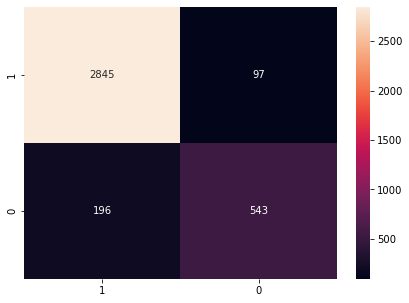

In [48]:
cm = confusion_matrix(y_pred, y_test, labels=[1,0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],columns = [i for i in ["1", "0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, fmt='g')

Very low number of missclassifications

### 4.Tabulate accuracy in terms of precision recall and F1 score.

In [49]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.85      0.79       640
           1       0.97      0.94      0.95      3041

    accuracy                           0.92      3681
   macro avg       0.85      0.89      0.87      3681
weighted avg       0.93      0.92      0.92      3681



These are helpful test metrics for the classification model